In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

匯入data

In [ ]:
x = np.genfromtxt('preprocessed_x_bathroom.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y_bathroom.csv', delimiter=',', dtype= None)

In [ ]:
feature_names=[]
for names in y:
  if names not in feature_names:
    feature_names.append(names)

DecisionTreeClassifier
                   precision    recall  f1-score   support

      b'bathroom'       0.25      0.29      0.27         7
       b'driving'       0.43      0.27      0.33        33
        b'eating'       0.19      0.29      0.23        45
         b'lying'       0.21      0.21      0.21        47
        b'riding'       0.00      0.00      0.00         2
       b'sitting'       0.57      0.60      0.59       216
      b'standing'       0.00      0.00      0.00         2
b'using_computer'       0.73      0.64      0.68       232
       b'walking'       0.27      0.29      0.28        28

         accuracy                           0.52       612
        macro avg       0.29      0.29      0.29       612
     weighted avg       0.55      0.52      0.53       612



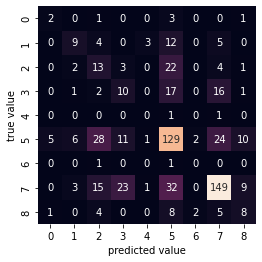

In [ ]:
dt = DecisionTreeClassifier()

for splits in range(5,7):
    fin_pred = cross_val_predict(dt, x, y, cv=splits)
    print("Desicion Tree")
    print(classification_report(y, fin_pred))

    cm = confusion_matrix(y_target=y, 
                y_predicted=fin_pred, 
                binary=False)
    fig,ax=plot_confusion_matrix(conf_mat=cm
                ,show_absolute=True
                ,show_normed=False
                ,colorbar=False
                ,class_names=feature_names
                #,cmap='PuBu'
                ,fontcolor_threshold=0.6
                )
    plt.show()